Performing  Engineering if enhancement is possible

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import numpy as np

merged_train = pd.read_csv('./data/train_merged.csv')
print(merged_train.shape)


C:\Users\yashk\AppData\Local\Temp\ipykernel_10976\301681607.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_train = pd.read_csv('./data/train_merged.csv')


(1017209, 17)


In [ ]:
print(merged_train.head())
print(merged_train['StateHoliday'].unique())
print(merged_train['Assortment'].unique())
print(merged_train['StoreType'])


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4  2015-07-31   5263        555     1      1            0   
1      2          4  2015-07-31   6064        625     1      1            0   
2      3          4  2015-07-31   8314        821     1      1            0   
3      4          4  2015-07-31  13995       1498     1      1            0   
4      5          4  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  StoreType  Assortment  \
0              1  2015      7   31          31          2           0   
1              1  2015      7   31          31          0           0   
2              1  2015      7   31          31          0           0   
3              1  2015      7   31          31          2           2   
4              1  2015      7   31          31          0           0   

   CompetitionDistance  Promo2  
0               1270.0       0  
1                570

In [ ]:
print(merged_train.isnull().sum())


Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Year                   0
Month                  0
Day                    0
WeekOfYear             0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64


In [15]:
print(merged_train['StateHoliday'].isnull().sum())

0


In [23]:
#converting all the stateHoliday into string 
merged_train['StateHoliday'] = merged_train['StateHoliday'].apply(lambda x : str(x))

In [24]:
merged_train.info()
#doing label encoding for categorical features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_train['StoreType'] = le.fit_transform(merged_train['StoreType'])
merged_train['Assortment'] = le.fit_transform(merged_train['Assortment'])
merged_train['StateHoliday'] = le.fit_transform(merged_train['StateHoliday'])
print(merged_train.head())


#still will try one hot encoding for categorical features and compare the results


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   Year                 1017209 non-null  int64  
 10  Month                1017209 non-null  int64  
 11  Day                  1017209 non-null  int64  
 12  WeekOfYear           1017209 non-null  int64  
 13  StoreType            1017209 non-null  int32  
 14  Assortment           1017209 non-null  int32  
 15

<Axes: >

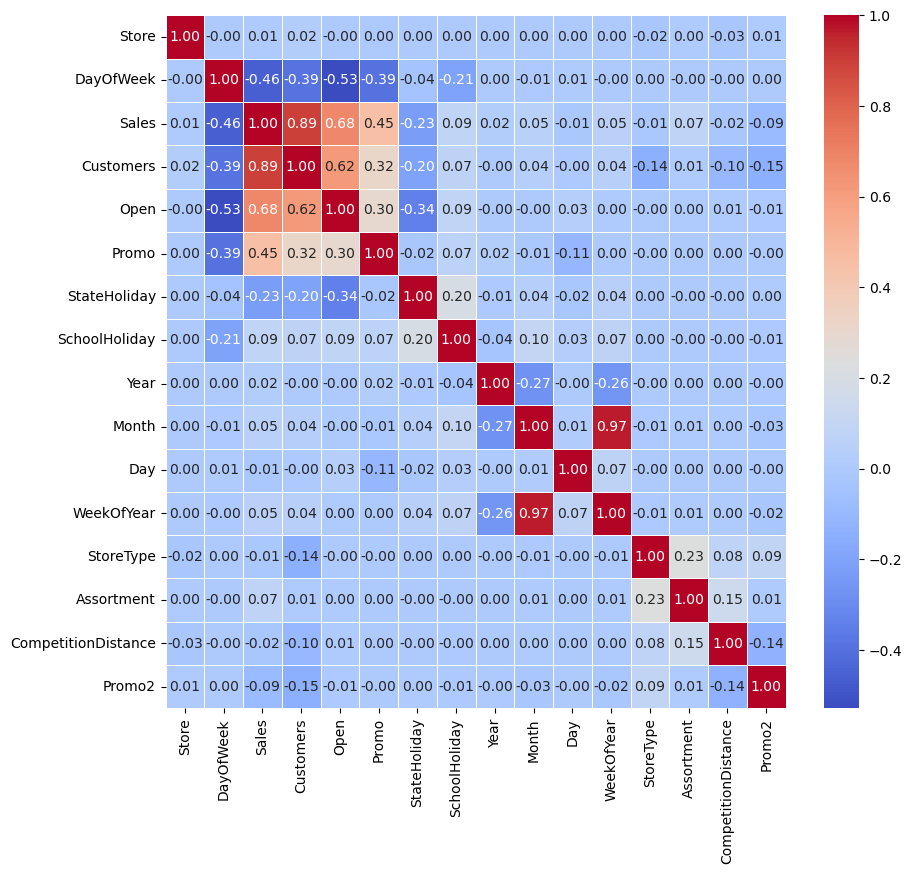

In [25]:
plt.figure(figsize=(10,9))
temp = merged_train.drop(columns = ['Date'])

sns.heatmap(temp.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

In [26]:
temp['AverageCustomers'] = temp['Sales']/temp['Customers']

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

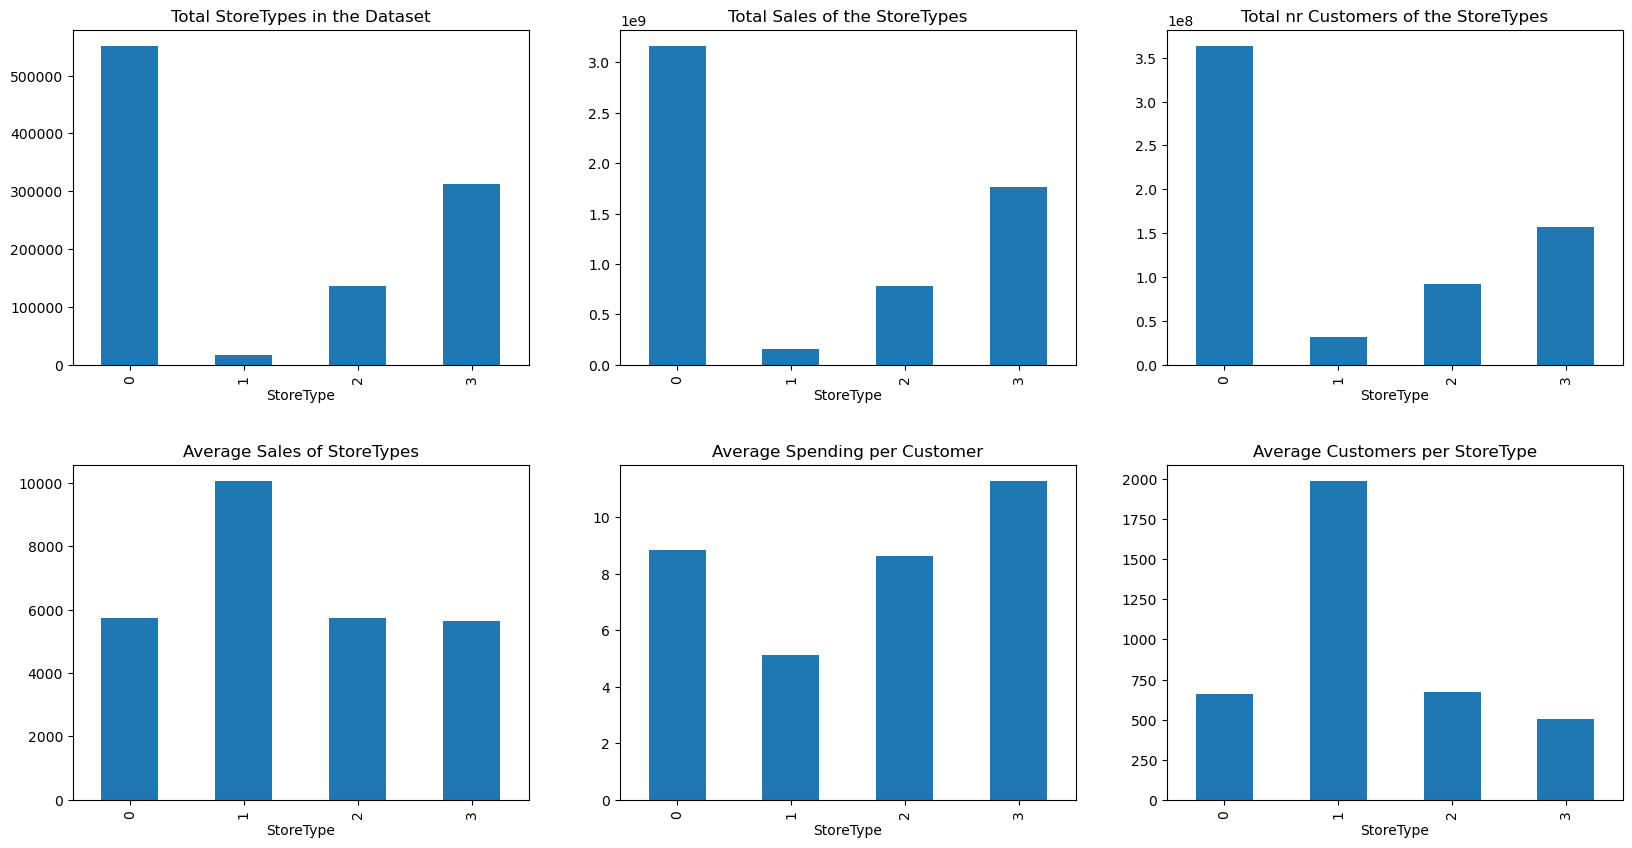

In [31]:
import matplotlib.pyplot as plt

def plot_storetype_analysis(temp):
    """
    Plots StoreType-based analysis:
    - Number of stores
    - Total sales
    - Total customers
    - Average sales
    - Average spending per customer
    - Average customers
    """

  
    if 'Avg_Customer_Sales' not in temp.columns:
        temp['Avg_Customer_Sales'] = temp['Sales'] / temp['Customers']

    # Create subplots
    f, ax = plt.subplots(2, 3, figsize=(20, 10))

    temp.groupby("StoreType")["Store"].count().plot(
        kind="bar", ax=ax[0, 0], title="Total StoreTypes in the Dataset"
    )

    temp.groupby("StoreType")["Sales"].sum().plot(
        kind="bar", ax=ax[0, 1], title="Total Sales of the StoreTypes"
    )

    temp.groupby("StoreType")["Customers"].sum().plot(
        kind="bar", ax=ax[0, 2], title="Total nr Customers of the StoreTypes"
    )

    temp.groupby("StoreType")["Sales"].mean().plot(
        kind="bar", ax=ax[1, 0], title="Average Sales of StoreTypes"
    )

    temp.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(
        kind="bar", ax=ax[1, 1], title="Average Spending per Customer"
    )

    temp.groupby("StoreType")["Customers"].mean().plot(
        kind="bar", ax=ax[1, 2], title="Average Customers per StoreType"
    )

    plt.subplots_adjust(hspace=0.3)
    plt.show()
plot_storetype_analysis(temp)


finding ,how much promotion impacted the sales 


c:\Users\yashk\OneDrive\Desktop\shivam\ProjectMachineLearning\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


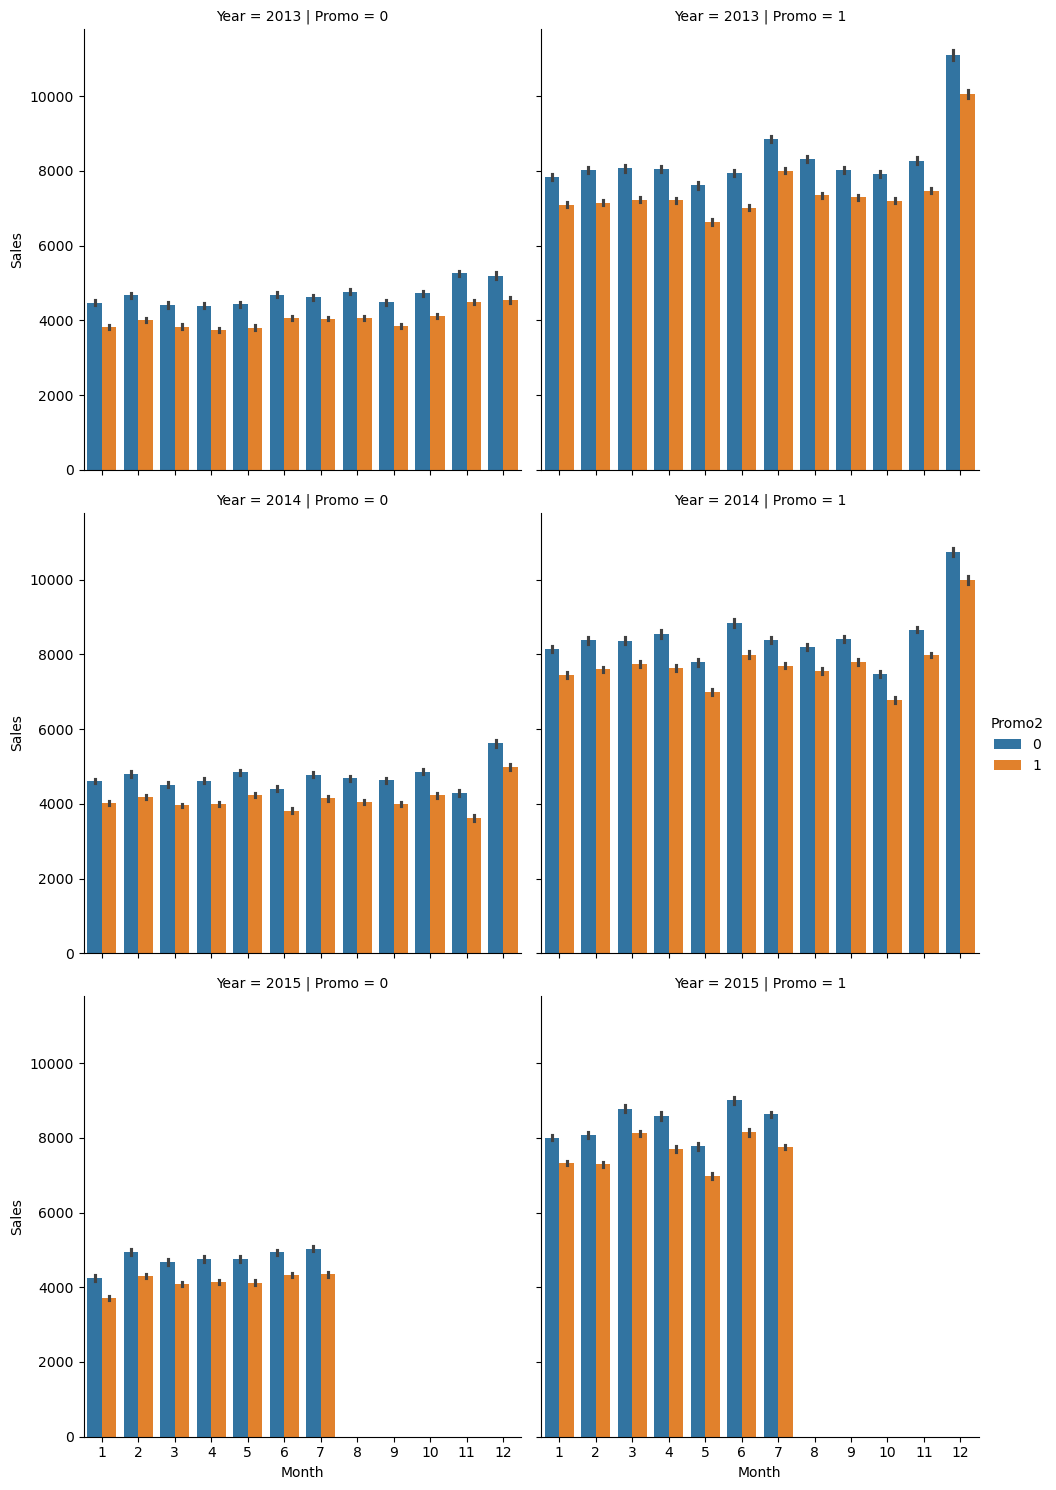

In [32]:
sns.catplot(
    data=temp,
    x="Month",
    y="Sales",
    col="Promo",     # per Promo in columns
    hue="Promo2",
    row="Year",
    kind="bar"
)

plt.show()


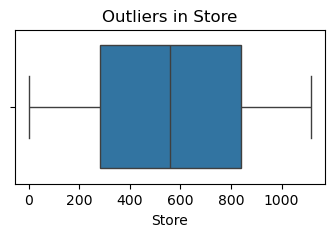

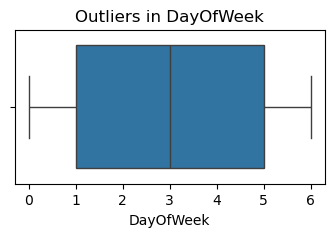

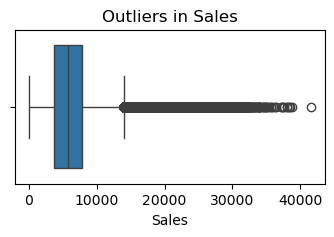

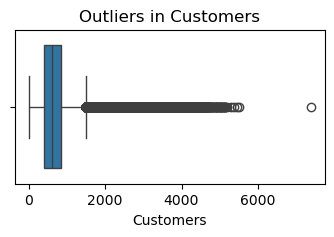

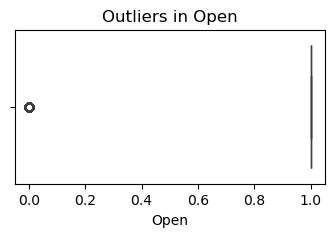

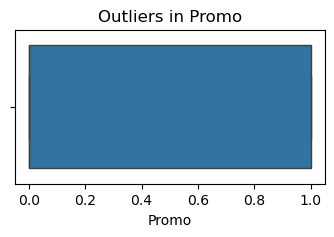

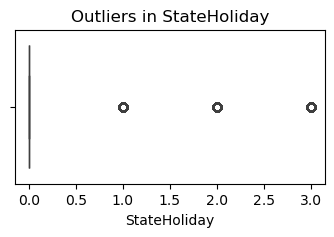

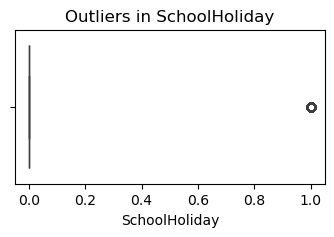

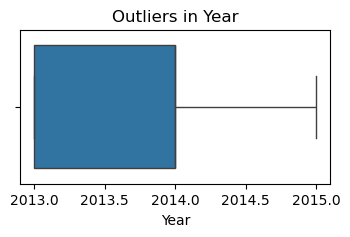

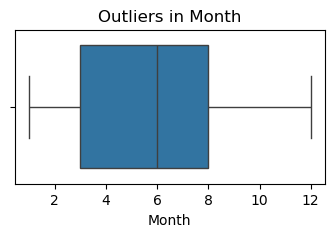

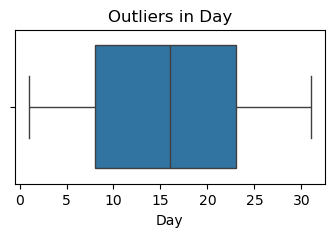

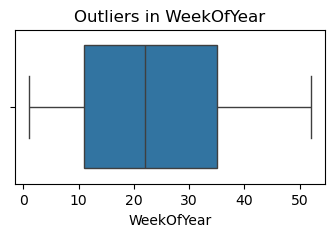

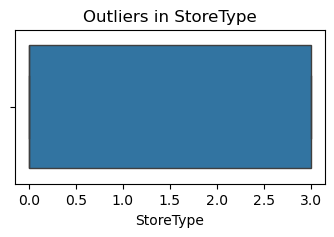

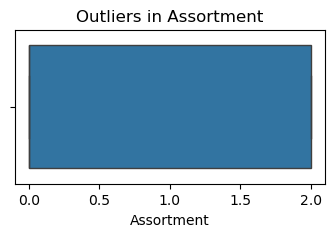

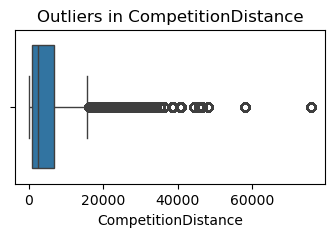

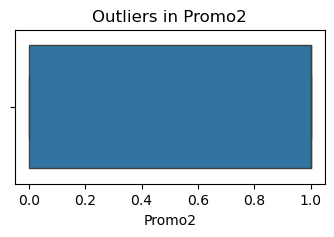

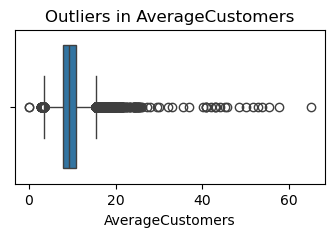

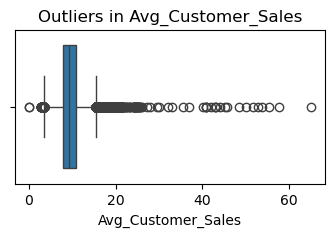

In [34]:
#just try to remove out liers from the dataset
import seaborn as sns
import matplotlib.pyplot as plt

for col in temp.select_dtypes(include='number').columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=temp[col])
    plt.title(f'Outliers in {col}')
    plt.show()


In [35]:
temp = temp.drop(columns = ['Avg_Customer_Sales'],axis = 1)

In [ ]:
#outliers are present in Sales Average Customers Competition distance Customers and Sales

finding the percentage present in outliers if less than some percentage will be good to remove that row or not

In [ ]:
def find_percentage_outliers(temp):
    outlier_percent = {}
    n = len(temp)
    for col in temp.select_dtypes(include='number').columns:
        Q1 = temp[col].quantile(0.25)
        Q3 = temp[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_count = ((temp[col] < lower) | (temp[col] > upper)).sum()
        outlier_pct = outlier_count / n * 100
        outlier_percent[col] = outlier_pct
    return outlier_percent


ans = find_percentage_outliers(temp)
for key, value in ans.items():
    print(f"{key} ---->>>> {value:.2f}%")
#first i will train the model without removing outliers 







Store ---->>>> 0.00%
DayOfWeek ---->>>> 0.00%
Sales ---->>>> 2.62%
Customers ---->>>> 3.75%
Open ---->>>> 16.99%
Promo ---->>>> 0.00%
StateHoliday ---->>>> 3.05%
SchoolHoliday ---->>>> 17.86%
Year ---->>>> 0.00%
Month ---->>>> 0.00%
Day ---->>>> 0.00%
WeekOfYear ---->>>> 0.00%
StoreType ---->>>> 0.00%
Assortment ---->>>> 0.00%
CompetitionDistance ---->>>> 9.75%
Promo2 ---->>>> 0.00%
AverageCustomers ---->>>> 0.74%


In [43]:

temp['AverageCustomers'] = temp['Customers']/temp['Store']
temp['Average_Sales'] = temp['Sales']/temp['Customers']

In [ ]:
#capping extreme outliers 
print(np.isinf(temp).sum().sum())


2274


In [47]:
#now just scale and transform the cols

from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
cols_to_scale = ['Sales', 'Customers', 'Open', 'CompetitionDistance','AverageCustomers','Average_Sales']
temp[cols_to_scale] =temp[cols_to_scale].replace([np.inf, -np.inf], np.nan)

imputer =  SimpleImputer(strategy='median')
temp[cols_to_scale] = imputer.fit_transform(temp[cols_to_scale])


scaler  = RobustScaler()
temp[cols_to_scale] = scaler.fit_transform(temp[cols_to_scale]) 


temp.to_csv('./data/preprocessed.csv',index = False)
